In [120]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#nltk.download()

# Initial operations and practice of the NLTK functionality

In [34]:
#Text taken from AN ANALYSIS OF RELIGIOUS BELIEF by John Russell Amberley (http://www.gutenberg.org/ebooks/64748)
file = 'text.txt'
text = open(file,'r').read()
print(text)

Human nature, among all the phenomena it offers to the curious
inquiries of the student, presents none of more transcendent interest
than the phenomenon of Religion. Pervading the whole history of mankind
from the very earliest ages of which we have any authentic knowledge up
to the present day; exercising on the wild and wandering tribes, which
seem to have divided the earth among them in those primitive times, an
influence scarcely less profound than it has ever exercised on the most
polite and cultivated nations of the modern cruel world; leading now to peace
and now to war; now to the firmest of alliances, now to the bitterest
enmities; uniting some in the bonds of a love so enduring as to outlast
and put to shame the fleeting unions of earthly passion; separating
others, even when every motive of interest and natural affection
conspired to unite them, so completely as to impel them to deliver
each other up to the ghastliest tortures; Religion deserves a foremost
place if not the f

In [35]:
# strip extra characters like dots:
for c in ['.',',',':',';']:
    text = text.replace(c,'')
print(text)

Human nature among all the phenomena it offers to the curious
inquiries of the student presents none of more transcendent interest
than the phenomenon of Religion Pervading the whole history of mankind
from the very earliest ages of which we have any authentic knowledge up
to the present day exercising on the wild and wandering tribes which
seem to have divided the earth among them in those primitive times an
influence scarcely less profound than it has ever exercised on the most
polite and cultivated nations of the modern cruel world leading now to peace
and now to war now to the firmest of alliances now to the bitterest
enmities uniting some in the bonds of a love so enduring as to outlast
and put to shame the fleeting unions of earthly passion separating
others even when every motive of interest and natural affection
conspired to unite them so completely as to impel them to deliver
each other up to the ghastliest tortures Religion deserves a foremost
place if not the foremost place 

In [36]:
len(text)

1686

In [37]:
#Split all the words into separate tokens
tokens = text.split()
print(tokens)

['Human', 'nature', 'among', 'all', 'the', 'phenomena', 'it', 'offers', 'to', 'the', 'curious', 'inquiries', 'of', 'the', 'student', 'presents', 'none', 'of', 'more', 'transcendent', 'interest', 'than', 'the', 'phenomenon', 'of', 'Religion', 'Pervading', 'the', 'whole', 'history', 'of', 'mankind', 'from', 'the', 'very', 'earliest', 'ages', 'of', 'which', 'we', 'have', 'any', 'authentic', 'knowledge', 'up', 'to', 'the', 'present', 'day', 'exercising', 'on', 'the', 'wild', 'and', 'wandering', 'tribes', 'which', 'seem', 'to', 'have', 'divided', 'the', 'earth', 'among', 'them', 'in', 'those', 'primitive', 'times', 'an', 'influence', 'scarcely', 'less', 'profound', 'than', 'it', 'has', 'ever', 'exercised', 'on', 'the', 'most', 'polite', 'and', 'cultivated', 'nations', 'of', 'the', 'modern', 'cruel', 'world', 'leading', 'now', 'to', 'peace', 'and', 'now', 'to', 'war', 'now', 'to', 'the', 'firmest', 'of', 'alliances', 'now', 'to', 'the', 'bitterest', 'enmities', 'uniting', 'some', 'in', 'the'

In [38]:
#Turn capital letters into lower ones
tokens=[token.lower() for token in tokens if token.isalpha()]
tokens

['human',
 'nature',
 'among',
 'all',
 'the',
 'phenomena',
 'it',
 'offers',
 'to',
 'the',
 'curious',
 'inquiries',
 'of',
 'the',
 'student',
 'presents',
 'none',
 'of',
 'more',
 'transcendent',
 'interest',
 'than',
 'the',
 'phenomenon',
 'of',
 'religion',
 'pervading',
 'the',
 'whole',
 'history',
 'of',
 'mankind',
 'from',
 'the',
 'very',
 'earliest',
 'ages',
 'of',
 'which',
 'we',
 'have',
 'any',
 'authentic',
 'knowledge',
 'up',
 'to',
 'the',
 'present',
 'day',
 'exercising',
 'on',
 'the',
 'wild',
 'and',
 'wandering',
 'tribes',
 'which',
 'seem',
 'to',
 'have',
 'divided',
 'the',
 'earth',
 'among',
 'them',
 'in',
 'those',
 'primitive',
 'times',
 'an',
 'influence',
 'scarcely',
 'less',
 'profound',
 'than',
 'it',
 'has',
 'ever',
 'exercised',
 'on',
 'the',
 'most',
 'polite',
 'and',
 'cultivated',
 'nations',
 'of',
 'the',
 'modern',
 'cruel',
 'world',
 'leading',
 'now',
 'to',
 'peace',
 'and',
 'now',
 'to',
 'war',
 'now',
 'to',
 'the',
 'fi

In [39]:
#printed the frequency table of all the words 
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print ("%30s %5d" % (str(key), val))

                         human     2
                        nature     2
                         among     3
                           all     2
                           the    23
                     phenomena     1
                            it     3
                        offers     1
                            to    17
                       curious     1
                     inquiries     1
                            of    19
                       student     1
                      presents     1
                          none     1
                          more     1
                  transcendent     1
                      interest     2
                          than     2
                    phenomenon     1
                      religion     3
                     pervading     1
                         whole     1
                       history     1
                       mankind     1
                          from     1
                          very     1
 

In [40]:
#Identifying the stopwords that carry no meaning in futher analysis
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
#Text without the stopwords
ctokens = tokens
for token in tokens:
    if token in sw:
        ctokens.remove(token)
print(ctokens)

['human', 'nature', 'among', 'phenomena', 'offers', 'curious', 'inquiries', 'student', 'presents', 'none', 'more', 'transcendent', 'interest', 'phenomenon', 'religion', 'pervading', 'whole', 'history', 'mankind', 'earliest', 'ages', 'authentic', 'knowledge', 'present', 'day', 'exercising', 'wild', 'wandering', 'tribes', 'seem', 'have', 'divided', 'earth', 'among', 'primitive', 'times', 'influence', 'scarcely', 'less', 'profound', 'it', 'ever', 'exercised', 'polite', 'cultivated', 'nations', 'modern', 'cruel', 'world', 'leading', 'peace', 'war', 'firmest', 'alliances', 'now', 'bitterest', 'enmities', 'uniting', 'the', 'bonds', 'love', 'enduring', 'outlast', 'put', 'shame', 'the', 'fleeting', 'unions', 'earthly', 'passion', 'separating', 'others', 'even', 'every', 'motive', 'interest', 'natural', 'affection', 'conspired', 'to', 'unite', 'completely', 'to', 'impel', 'to', 'deliver', 'other', 'to', 'the', 'ghastliest', 'tortures', 'religion', 'deserves', 'foremost', 'place', 'the', 'foremo

In [42]:
len(ctokens)

190

In [43]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
for i in range(len(ctokens)):
    ctokens[i] = lemmatizer.lemmatize(ctokens[i])

print(ctokens)

['human', 'nature', 'among', 'phenomenon', 'offer', 'curious', 'inquiry', 'student', 'present', 'none', 'more', 'transcendent', 'interest', 'phenomenon', 'religion', 'pervading', 'whole', 'history', 'mankind', 'earliest', 'age', 'authentic', 'knowledge', 'present', 'day', 'exercising', 'wild', 'wandering', 'tribe', 'seem', 'have', 'divided', 'earth', 'among', 'primitive', 'time', 'influence', 'scarcely', 'le', 'profound', 'it', 'ever', 'exercised', 'polite', 'cultivated', 'nation', 'modern', 'cruel', 'world', 'leading', 'peace', 'war', 'firmest', 'alliance', 'now', 'bitterest', 'enmity', 'uniting', 'the', 'bond', 'love', 'enduring', 'outlast', 'put', 'shame', 'the', 'fleeting', 'union', 'earthly', 'passion', 'separating', 'others', 'even', 'every', 'motive', 'interest', 'natural', 'affection', 'conspired', 'to', 'unite', 'completely', 'to', 'impel', 'to', 'deliver', 'other', 'to', 'the', 'ghastliest', 'torture', 'religion', 'deserves', 'foremost', 'place', 'the', 'foremost', 'place', '

In [44]:
#Final frequency
freq = nltk.FreqDist(ctokens)
for key,val in freq.items(): 
    print ("%30s %5d" % (str(key), val))

                         human     2
                        nature     2
                         among     3
                    phenomenon     2
                         offer     1
                       curious     1
                       inquiry     2
                       student     2
                       present     2
                          none     1
                          more     1
                  transcendent     1
                      interest     2
                      religion     3
                     pervading     1
                         whole     1
                       history     1
                       mankind     1
                      earliest     1
                           age     1
                     authentic     1
                     knowledge     1
                           day     1
                    exercising     1
                          wild     1
                     wandering     1
                         tribe     1
 

In [45]:
#opened file with the list of positive words for futher analysis
file_positive = 'p.txt'
pos = open(file_positive,'r').read().split()
print(pos)

['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'agreeabl

In [46]:
#opened file with the list of negative words for futher analysis
file_negative = 'n.txt'
neg = open(file_negative,'r').read().split()
print(neg)

['abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggressive', 'aggressiveness'

In [47]:
#Calculations of the negative, positive and neutral words as well as the total count
countpositive = countnegative = countneutral = counttotal = 0
for token in ctokens:
    counttotal = counttotal + 1
    cat = ""
    if token in pos:
        cat = cat + "POS"
        countpositive = countpositive + 1
    elif token in neg:
        cat = cat + "NEG"
        countnegative = countnegative + 1
    else:
        countneutral = countneutral + 1
    print("Word:", token, cat)

Word: human 
Word: nature 
Word: among 
Word: phenomenon 
Word: offer 
Word: curious 
Word: inquiry 
Word: student 
Word: present 
Word: none 
Word: more 
Word: transcendent 
Word: interest 
Word: phenomenon 
Word: religion 
Word: pervading 
Word: whole 
Word: history 
Word: mankind 
Word: earliest 
Word: age 
Word: authentic POS
Word: knowledge 
Word: present 
Word: day 
Word: exercising 
Word: wild NEG
Word: wandering 
Word: tribe 
Word: seem 
Word: have 
Word: divided 
Word: earth 
Word: among 
Word: primitive NEG
Word: time 
Word: influence 
Word: scarcely NEG
Word: le 
Word: profound POS
Word: it 
Word: ever 
Word: exercised 
Word: polite POS
Word: cultivated 
Word: nation 
Word: modern POS
Word: cruel NEG
Word: world 
Word: leading POS
Word: peace POS
Word: war 
Word: firmest 
Word: alliance 
Word: now 
Word: bitterest 
Word: enmity NEG
Word: uniting 
Word: the 
Word: bond 
Word: love POS
Word: enduring 
Word: outlast 
Word: put 
Word: shame NEG
Word: the 
Word: fleeting NEG
Word

In [48]:
#Overall positive, negative, neutral, positiveness and affection values
print("Positive=%.3f Negative=%.3f Neutral=%.3f" % (countpositive/counttotal, countnegative/counttotal, countneutral/counttotal))

print("Positiveness=%.3f Affection=%.3f" % (math.log(countpositive/countnegative), 1-countneutral/counttotal))

Positive=0.068 Negative=0.053 Neutral=0.879
Positiveness=0.262 Affection=0.121


# Main Assignment (score and delta3 values)

In [109]:
#empty array
score = []

In [110]:
#This part is done on the basis of the already presented code,yet with some changes to count 
#the score(positive - negative) of each group of words. Each group consists of 10 words, which makes 19 groups (190/10)

countpositive1 = countnegative1 = countneutral1 = counttotal1 = counttotal2 = 0
count = 0
for token in ctokens:
    counttotal1 = counttotal1 + 1
    if(counttotal1 % 10 == 0):
        cat = ""
        if token in pos:
            cat = cat + "POS"
            countpositive1 = countpositive1 + 1
            count = countpositive1 - countnegative1
            score.append(count)
            count = 0
            countpositive1 = 0
            countnegative1 = 0
        elif token in neg:
            cat = cat + "NEG"
            countnegative1 = countnegative1 + 1
            count = countpositive1 - countnegative1
            score.append(count)
            count = 0
            countpositive1 = 0
            countnegative1 = 0
        else:
            countneutral1 = countneutral1 + 1
            count = countpositive1 - countnegative1
            score.append(count)
            count = 0
            countpositive1 = 0
            countnegative1 = 0
        
    else:
        cat = ""
        if token in pos:
            cat = cat + "POS"
            countpositive1 = countpositive1 + 1
        elif token in neg:
            cat = cat + "NEG"
            countnegative1 = countnegative1 + 1
        else:
            countneutral1 = countneutral1 + 1
        print("Word:", token, cat)

Word: human 
Word: nature 
Word: among 
Word: phenomenon 
Word: offer 
Word: curious 
Word: inquiry 
Word: student 
Word: present 
Word: more 
Word: transcendent 
Word: interest 
Word: phenomenon 
Word: religion 
Word: pervading 
Word: whole 
Word: history 
Word: mankind 
Word: age 
Word: authentic POS
Word: knowledge 
Word: present 
Word: day 
Word: exercising 
Word: wild NEG
Word: wandering 
Word: tribe 
Word: have 
Word: divided 
Word: earth 
Word: among 
Word: primitive NEG
Word: time 
Word: influence 
Word: scarcely NEG
Word: le 
Word: it 
Word: ever 
Word: exercised 
Word: polite POS
Word: cultivated 
Word: nation 
Word: modern POS
Word: cruel NEG
Word: world 
Word: peace POS
Word: war 
Word: firmest 
Word: alliance 
Word: now 
Word: bitterest 
Word: enmity NEG
Word: uniting 
Word: the 
Word: love POS
Word: enduring 
Word: outlast 
Word: put 
Word: shame NEG
Word: the 
Word: fleeting NEG
Word: union 
Word: earthly 
Word: separating 
Word: others 
Word: even 
Word: every 
Word: mo

In [111]:
#Score for each group of 10 tokens
score

[0, 0, 0, -1, 2, 0, 0, 1, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, -1]

In [112]:
#Verification that there are exactly 19 groups
len(score)

19

In [117]:
# Counting the delta values in the radious of 5
delta3 = []

for i in score:
    cv = 0
    cv = score[i] + score[i-1] + score[i+1] + score[i-2] + score[i+2]
    cv = cv/5
    delta3.append(cv)


In [118]:
delta3

[-0.2,
 -0.2,
 -0.2,
 0.0,
 0.2,
 -0.2,
 -0.2,
 -0.4,
 -0.2,
 -0.4,
 -0.2,
 -0.2,
 0.0,
 -0.4,
 -0.2,
 -0.2,
 -0.4,
 -0.2,
 0.0]

In [119]:
#Verification that there are exactly 19 groups
len(delta3)

19

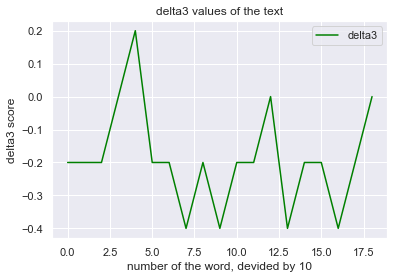

In [133]:
#Graph shows the dynamic change of possitiveness among the text
plt.plot(delta3, label='delta3', color = 'green')
plt.legend()
plt.xlabel('number of the word, devided by 10')
plt.ylabel('delta3 score')
plt.title('delta3 values of the text')
plt.show()